In [175]:
import os
import pandas as pd
import numpy as np
import scipy as st
import matplotlib.pyplot as plt
import pathlib as path



In [176]:
marvel_vs_dc_df = pd.read_csv('Marvel Vs DC NEW.csv')
marvel_dc_movie_df = pd.read_csv('dc_marvel_movie_performance.csv')
mcu_boxoffice_df = pd.read_csv('mcu_box_office.csv')

#merged_df = pd.merge(marvel_vs_dc_df, marvel_dc_movie_df, mcu_boxoffice_df, how = 'left', on=)

#merged_df.head()                     
marvel_dc_movie_df.dtypes


Film                                             object
U.S. release date                                object
Box office gross Domestic (U.S. and Canada )     object
Box office gross Other territories               object
Box office gross Worldwide                       object
Budget                                           object
MCU                                                bool
Phase                                           float64
Distributor                                      object
MPAA Rating                                      object
Length                                           object
Minutes                                           int64
Franchise                                        object
Character Family                                 object
Domestic %                                       object
Gross to Budget                                 float64
Rotten Tomatoes Critic Score                      int64
Male/Female-led                                 

In [177]:
#Marvel types

marvel_dc_movie_df.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449.00","$166,000,000.00","$300,478,449.00","$55,000,000.00",False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94,Male,1978,"$1,404,237,104.00","$257,033,544.00","$137,500,000.00",Success
1,Superman II,19/06/1981,"$108,185,706.00","$108,200,000.00","$216,385,706.00","$54,000,000.00",False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83,Male,1981,"$725,336,273.00","$181,010,842.00","$135,000,000.00",Success
2,Superman III,17/06/1983,"$59,950,623.00","$20,300,000.00","$80,250,623.00","$39,000,000.00",False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29,Male,1983,"$245,506,947.00","$119,310,861.00","$97,500,000.00",Flop
3,Supergirl,21/11/1984,"$14,296,438.00",NaN,"$14,296,438.00","$35,000,000.00",False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8,Female,1984,"$41,926,345.00","$102,642,497.00","$87,500,000.00",Flop
4,Howard the Duck,01/08/1986,"$16,295,774.00","$21,667,000.00","$37,962,774.00","$37,000,000.00",False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774.00","$37,000,000.00","$92,500,000.00",Flop


In [178]:
grouped_movie_df = marvel_dc_movie_df.groupby(['Film','Franchise', 'Year', 'Rotten Tomatoes Critic Score', 'Budget'])
grouped_movie_df.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449.00","$166,000,000.00","$300,478,449.00","$55,000,000.00",False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94,Male,1978,"$1,404,237,104.00","$257,033,544.00","$137,500,000.00",Success
1,Superman II,19/06/1981,"$108,185,706.00","$108,200,000.00","$216,385,706.00","$54,000,000.00",False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83,Male,1981,"$725,336,273.00","$181,010,842.00","$135,000,000.00",Success
2,Superman III,17/06/1983,"$59,950,623.00","$20,300,000.00","$80,250,623.00","$39,000,000.00",False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29,Male,1983,"$245,506,947.00","$119,310,861.00","$97,500,000.00",Flop
3,Supergirl,21/11/1984,"$14,296,438.00",NaN,"$14,296,438.00","$35,000,000.00",False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8,Female,1984,"$41,926,345.00","$102,642,497.00","$87,500,000.00",Flop
4,Howard the Duck,01/08/1986,"$16,295,774.00","$21,667,000.00","$37,962,774.00","$37,000,000.00",False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774.00","$37,000,000.00","$92,500,000.00",Flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,The Flash,16/06/2023,"$108,133,313.00","$162,500,000.00","$270,633,313.00","$200,000,000.00",False,NaN,Warner Bros.,PG-13,...,Flash,40%,1.35,63,Male,2023,"$270,633,313.00","$200,000,000.00","$500,000,000.00",Flop
109,Blue Beetle,18/08/2023,"$72,488,072.00","$56,800,000.00","$129,288,072.00","$120,000,000.00",False,NaN,Warner Bros.,PG-13,...,Blue Beetle,56%,1.08,78,Male,2023,"$129,288,072.00","$120,000,000.00","$300,000,000.00",Flop
110,The Marvels,10/11/2023,"$84,500,223.00","$121,373,601.00","$205,873,824.00","$219,800,000.00",True,5.0,Walt Disney Studios Motion Pictures,PG-13,...,Captain Marvel,41%,0.94,62,Female,2023,"$205,873,824.00","$219,800,000.00","$549,500,000.00",Flop
111,Aquaman and the Lost Kingdom,20/12/2023,"$124,436,589.00","$309,900,000.00","$434,336,589.00","$205,000,000.00",False,NaN,Warner Bros.,PG-13,...,Aquaman,29%,2.12,35,Male,2023,"$434,336,589.00","$205,000,000.00","$512,500,000.00",Flop


In [179]:
# baseline rotten tomato score
rotten_score_avg = grouped_movie_df['Rotten Tomatoes Critic Score'].mean()
rotten_score_avg

Film                               Franchise  Year  Rotten Tomatoes Critic Score  Budget         
Ant-Man                            Marvel     2015  83                            $130,000,000.00    83.0
Ant-Man and the Wasp               Marvel     2018  87                            $162,000,000.00    87.0
Ant-Man and the Wasp: Quantumania  Marvel     2023  46                            $200,000,000.00    46.0
Aquaman                            DC         2018  66                            $160,000,000.00    66.0
Aquaman and the Lost Kingdom       DC         2023  35                            $205,000,000.00    35.0
                                                                                                     ... 
X-Men: Apocalypse                  Marvel     2016  47                            $178,000,000.00    47.0
X-Men: Days of Future Past         Marvel     2014  90                            $200,000,000.00    90.0
X-Men: First Class                 Marvel     2011  86

In [180]:
# Baseline average for the two
rotten_avg = marvel_dc_movie_df['Rotten Tomatoes Critic Score'].mean()
rotten_avg

62.43362831858407

In [181]:
years_df = grouped_movie_df['Year'].mean()
years_df

Film                               Franchise  Year  Rotten Tomatoes Critic Score  Budget         
Ant-Man                            Marvel     2015  83                            $130,000,000.00    2015.0
Ant-Man and the Wasp               Marvel     2018  87                            $162,000,000.00    2018.0
Ant-Man and the Wasp: Quantumania  Marvel     2023  46                            $200,000,000.00    2023.0
Aquaman                            DC         2018  66                            $160,000,000.00    2018.0
Aquaman and the Lost Kingdom       DC         2023  35                            $205,000,000.00    2023.0
                                                                                                      ...  
X-Men: Apocalypse                  Marvel     2016  47                            $178,000,000.00    2016.0
X-Men: Days of Future Past         Marvel     2014  90                            $200,000,000.00    2014.0
X-Men: First Class                 Mar

In [182]:
franchise_ratings = marvel_dc_movie_df.groupby('Franchise')['Rotten Tomatoes Critic Score'].mean()
franchise_ratings

Franchise
DC        57.560976
Marvel    65.208333
Name: Rotten Tomatoes Critic Score, dtype: float64

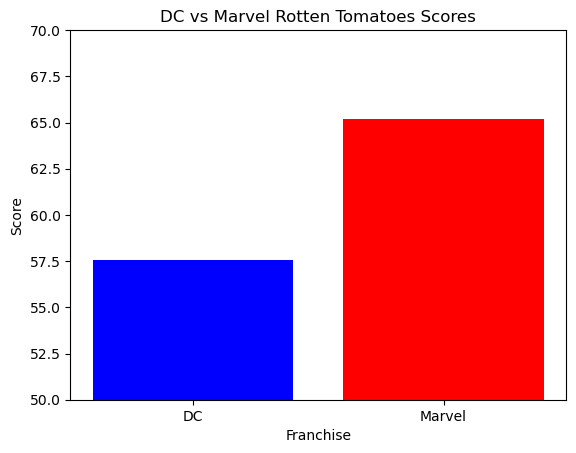

In [183]:
#movie_score_df['Rotten Tomatoes Critic Score'] = (
 #   franchise_ratings['Rotten Tomatoes Critic Score']
  #  .replace({'\\$': '', ',': ''}, regex=True)
   # .astype(float)
#)

plt.bar(franchise_ratings.index, franchise_ratings, color=['blue', 'red'])

plt.title( 'DC vs Marvel Rotten Tomatoes Scores')
plt.xlabel('Franchise')
plt.ylabel('Score')
#plt.xlim(['Franchise'])
plt.ylim(50,70)
#plt.box(['franchise_ratings'])
plt.tight_layout
plt.show()

In [184]:
# test

#marvel_info = grouped_movie_df.loc(['Franchise'] == 'Marvel')
#marvel_info

In [191]:
marvel_vs_dc_df['Budget'] = (
    marvel_vs_dc_df['Budget']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)


budget_tomatoes_to_plot = movie_performance_df['Budget'], marvel_dc_movie_df['Rotten Tomatoes Critic Score']
plt.figure(figsize=(10, 5))
plt.boxplot(data_to_plot, labels=['Budget', 'Rotten Tomatoes Critic Score'])
plt.title('Budget vs. Rotten Tomatoes Score')
plt.ylabel('Dollars ($)')
plt.yscale('log')  # Optional: Use a logarithmic scale for better visibility
plt.grid(axis='y')
plt.tight_layout
plt.show()

KeyError: 'Budget'